<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/Capstone_edX/Module%203/Survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:


In [6]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [61]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/Capstone_edX/Module%203/Survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


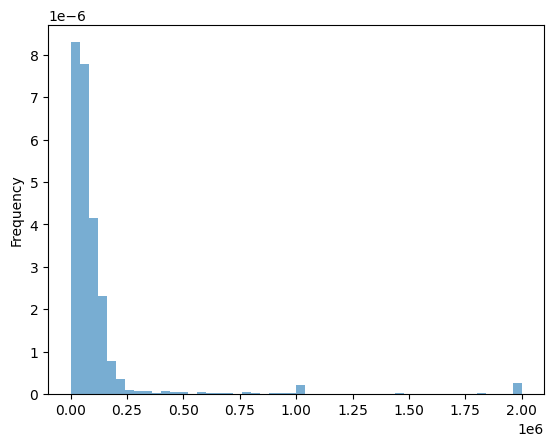

<class 'ModuleNotFoundError'>: The module 'scipy' is included in the Pyodide distribution, but it is not installed.
You can install it by calling:
  await micropip.install("scipy") in Python, or
  await pyodide.loadPackage("scipy") in JavaScript
See https://pyodide.org/en/stable/usage/loading-packages.html for more details.

In [10]:
# your code goes here
df = df.dropna(subset=['ConvertedComp'])


df['ConvertedComp'].plot(kind='hist', bins=50, alpha=0.6, density=True)
df['ConvertedComp'].plot(kind='kde', label='KDE')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.title('Distribution of Annual USD Salaries')
plt.show()

Plot the histogram for the column `ConvertedComp`.


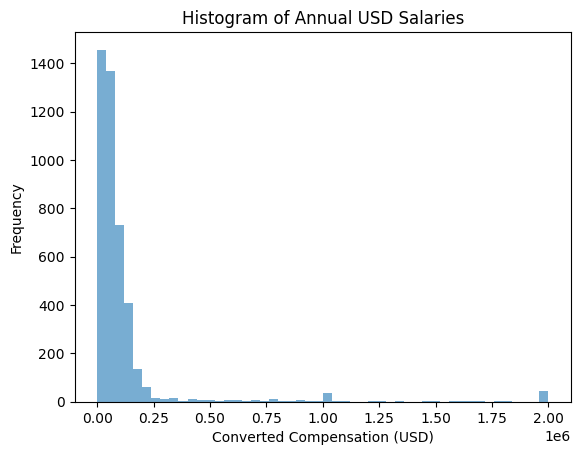

In [11]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', bins=50, alpha=0.6)

# Add labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Annual USD Salaries')

# Show plot
plt.show()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
CovertedComp_median = df['ConvertedComp'].median()
print(CovertedComp_median)

60505.0


How many responders identified themselves only as a **Man**?


In [68]:
# your code goes here
df = df.dropna(subset=['Gender'])
man_count = df[df['Gender'] == 'Man'].shape[0]
print(man_count)

4184


In [69]:
df = df.dropna(subset=['Gender'])
man_count = df[df['Gender'] == 'Woman'].shape[0]
print(man_count)

171


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [66]:
# your code goes here
#df = df.dropna(subset=['Gender','ConvertedComp'])
df = df.dropna(subset=['Gender'])
woman_df = df[df['Gender'] == 'Woman']
woman_count = woman_df[woman_df['Gender']].median()
#woman_median = woman_df['ConvertedComp'].median()
print(woman_count)

<class 'KeyError'>: "None of [Index(['Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman',\n       'Woman', 'Woman',\n       ...\n       'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman',\n       'Woman', 'Woman'],\n      dtype='object', length=171)] are in the [columns]"

In [49]:
age_df = df.dropna(subset=[ 'Respondent', 'Age'])
age_median = age_df['Age'].median()
print(age_median)

30.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [20]:
# your code goes here
df.describe()

,Unnamed: 0,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs,NormalizedAnnualCompensation
count,4387.000000,4387.000000,4387.000000,4.387000e+03,4.387000e+03,4387.000000,4.387000e+03
mean,27359.175291,27706.553681,31.950308,2.660490e+06,1.131856e+05,41.240517,1.278719e+07
std,18088.584537,18494.392146,7.357480,4.213257e+07,2.495196e+05,15.226409,1.153630e+08
min,9.000000,10.000000,17.000000,0.000000e+00,0.000000e+00,2.000000,0.000000e+00
25%,12231.000000,12270.000000,27.000000,3.000000e+04,3.015600e+04,40.000000,5.900000e+04
50%,24973.000000,25066.000000,30.000000,7.200000e+04,6.050500e+04,40.000000,1.080000e+05
75%,45370.500000,46316.500000,36.000000,1.300000e+05,1.000000e+05,45.000000,3.438000e+05
max,63517.000000,64938.000000,70.000000,1.900000e+09,2.000000e+06,425.000000,2.400000e+09


Plot a histogram of the column `Age`.


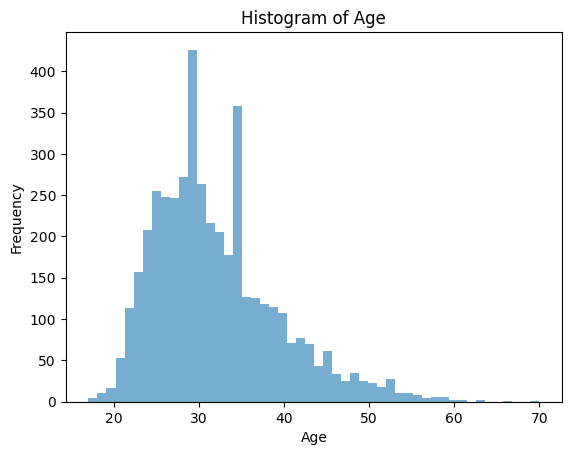

In [22]:
# your code goes here
df['Age'].plot(kind='hist', bins=50, alpha=0.6)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


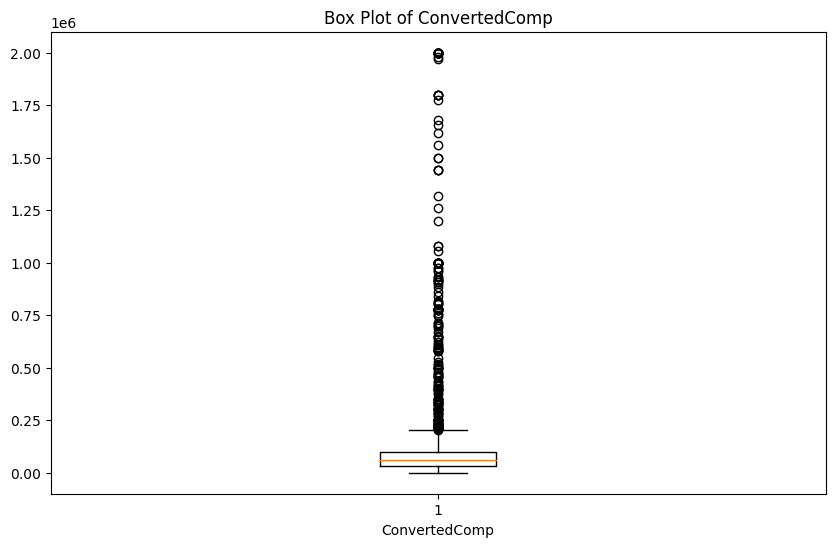

In [24]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=True)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [26]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

69844.0


Find out the upper and lower bounds.


In [27]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"lower bound = {lower_bound}, and upper bound = {upper_bound}")

lower bound = -74610.0, and upper bound = 204766.0


Identify how many outliers are there in the `ConvertedComp` column.


In [41]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
print(outliers.shape[0])

266


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [42]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
df_no_outliers.reset_index(drop=True, inplace=True)

print(df_no_outliers.shape[0])

4121


In [70]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [71]:
median_converted_comp = df_no_outliers['ConvertedComp'].median()

In [72]:
print(median_converted_comp)

56723.0


In [50]:
df_no_outliers.describe()

,Unnamed: 0,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs,NormalizedAnnualCompensation
count,4121.000000,4121.000000,4121.000000,4.121000e+03,4121.000000,4121.000000,4.121000e+03
mean,27372.660034,27719.770687,31.851007,2.766880e+06,64115.964086,41.050146,1.310114e+07
std,18051.035280,18456.517155,7.323398,4.343373e+07,44565.321912,14.351160,1.176056e+08
min,9.000000,10.000000,17.000000,0.000000e+00,0.000000,2.000000,0.000000e+00
25%,12320.000000,12359.000000,27.000000,2.700000e+04,28105.000000,40.000000,5.500000e+04
50%,24981.000000,25074.000000,30.000000,7.000000e+04,56723.000000,40.000000,1.000000e+05
75%,45352.000000,46298.000000,36.000000,1.300000e+05,90000.000000,44.000000,2.076000e+05
max,63517.000000,64938.000000,70.000000,1.900000e+09,202000.000000,385.000000,2.400000e+09


In [53]:
df_no_outliers['ConvertedComp'].mean()

64115.9640863868

In [54]:
df_no_outliers['ConvertedComp'].median()

56723.0

In [43]:
df_outliers = df_no_outliers[(df_no_outliers['ConvertedComp'] >= lower_bound) | (df_no_outliers['ConvertedComp'] <= upper_bound)]
print(df_outliers.shape[0])

4121


In [60]:
no_out_df = df_no_outliers.dropna(subset=['Gender','ConvertedComp'])
woman_df = no_out_df[no_out_df['Gender'] == 'Woman']
woman_median = woman_df['ConvertedComp'].median()
print(woman_median)

58167.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [56]:
# your code goes here
correlation = df.corr()['Age']
print(correlation)

<ipython-input-56-8b32a7e8d414>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Age']


Unnamed: 0                     -0.008324
Respondent                     -0.007600
Age                             1.000000
CompTotal                       0.004144
ConvertedComp                   0.093098
WorkWeekHrs                     0.031990
NormalizedAnnualCompensation   -0.020290
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
